## Access Satellite SST 1Day SNPP (Zarr)
This Jupyter notebook demonstrates how to access and plot satellite_sst_1day_snpp data, available as a [Zarr](https://zarr.dev/) dataset stored on S3.

🔗 More information about the dataset is available [in the AODN metadata catalogue](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/8e00907f-716d-4080-b212-534fcd78a602).

📌 The source of truth for this notebook is maintained on [GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_sst_1day_snpp.ipynb).


In [1]:
dataset_name = "satellite_sst_1day_snpp"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Resolved 241 packages in 54ms
Audited 241 packages in 1ms
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


✅ Local version 0.3.2 is up to date (remote: 0.3.2)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
# remote zarr dataset
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 615 ms, sys: 61.8 ms, total: 677 ms
Wall time: 1.21 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 1325 ;
	latitude = 9601 ;
	longitude = 13601 ;

variables:
	object filename(time) ;
	float64 latitude(latitude) ;
		latitude:axis = Y ;
		latitude:long_name = latitude ;
		latitude:standard_name = latitude ;
		latitude:units = degrees_north ;
	float64 longitude(longitude) ;
		longitude:axis = X ;
		longitude:long_name = longitude ;
		longitude:standard_name = longitude ;
		longitude:units = degrees_east ;
	float64 sst(time, latitude, longitude) ;
		sst:flag_applied = HISATZEN HIGLINT LAND CLDICE NAVFAIL ;
		sst:long_name = Sea Surface Temperature ;
		sst:units = Celsius ;
	datetime64[ns] time(time) ;
		time:axis = T ;
		time:long_name = time ;
		time:standard_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:dataset_name = satellite_sst_1day_snpp ;
	:history = File initialised at 2026-01-12T23:10:50.227980
Initialised var sst at 2026-01-12T23:13:31.289248
Add Granule V20260101_0142.20260101213100.L2OC_VIIRS.sst.nc at 2026-01-12T23:13:3

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2022-05-21 05:30:00'), Timestamp('2026-01-19 05:30:00'))

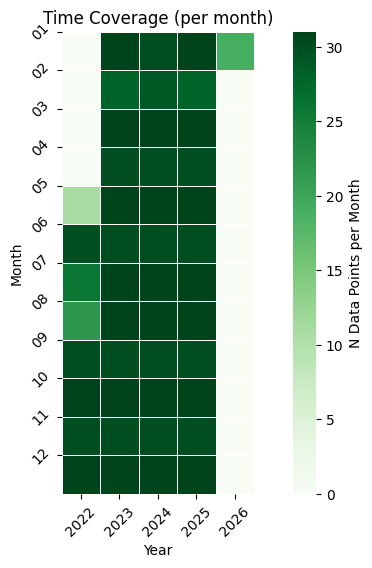

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:1469: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[self.var_name].resample(resample)


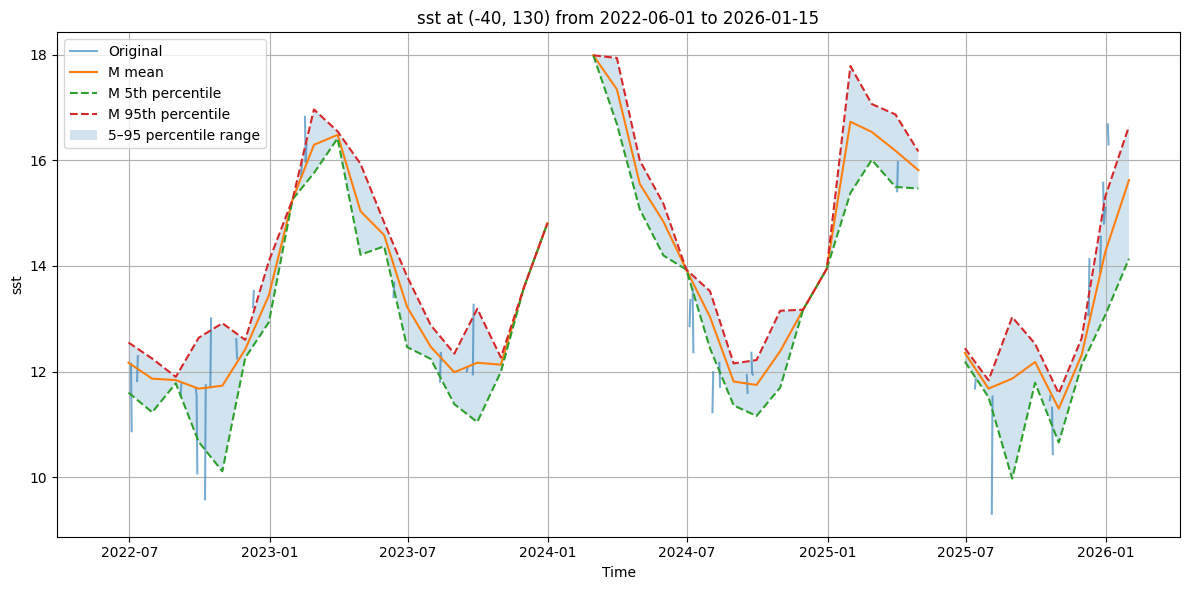

CPU times: user 4.1 s, sys: 868 ms, total: 4.96 s
Wall time: 10.4 s


In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sst', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2022-06-01', 
                                                  date_end='2026-01-15', 
                                                  lon_name_override="longitude", 
                                                  lat_name_override="latitude").plot_timeseries()

## Plot a gridded variable

2026-01-21 15:00:24,247 - aodn.GetAodn - INFO - Plotting 'Sea Surface Temperature' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2869: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


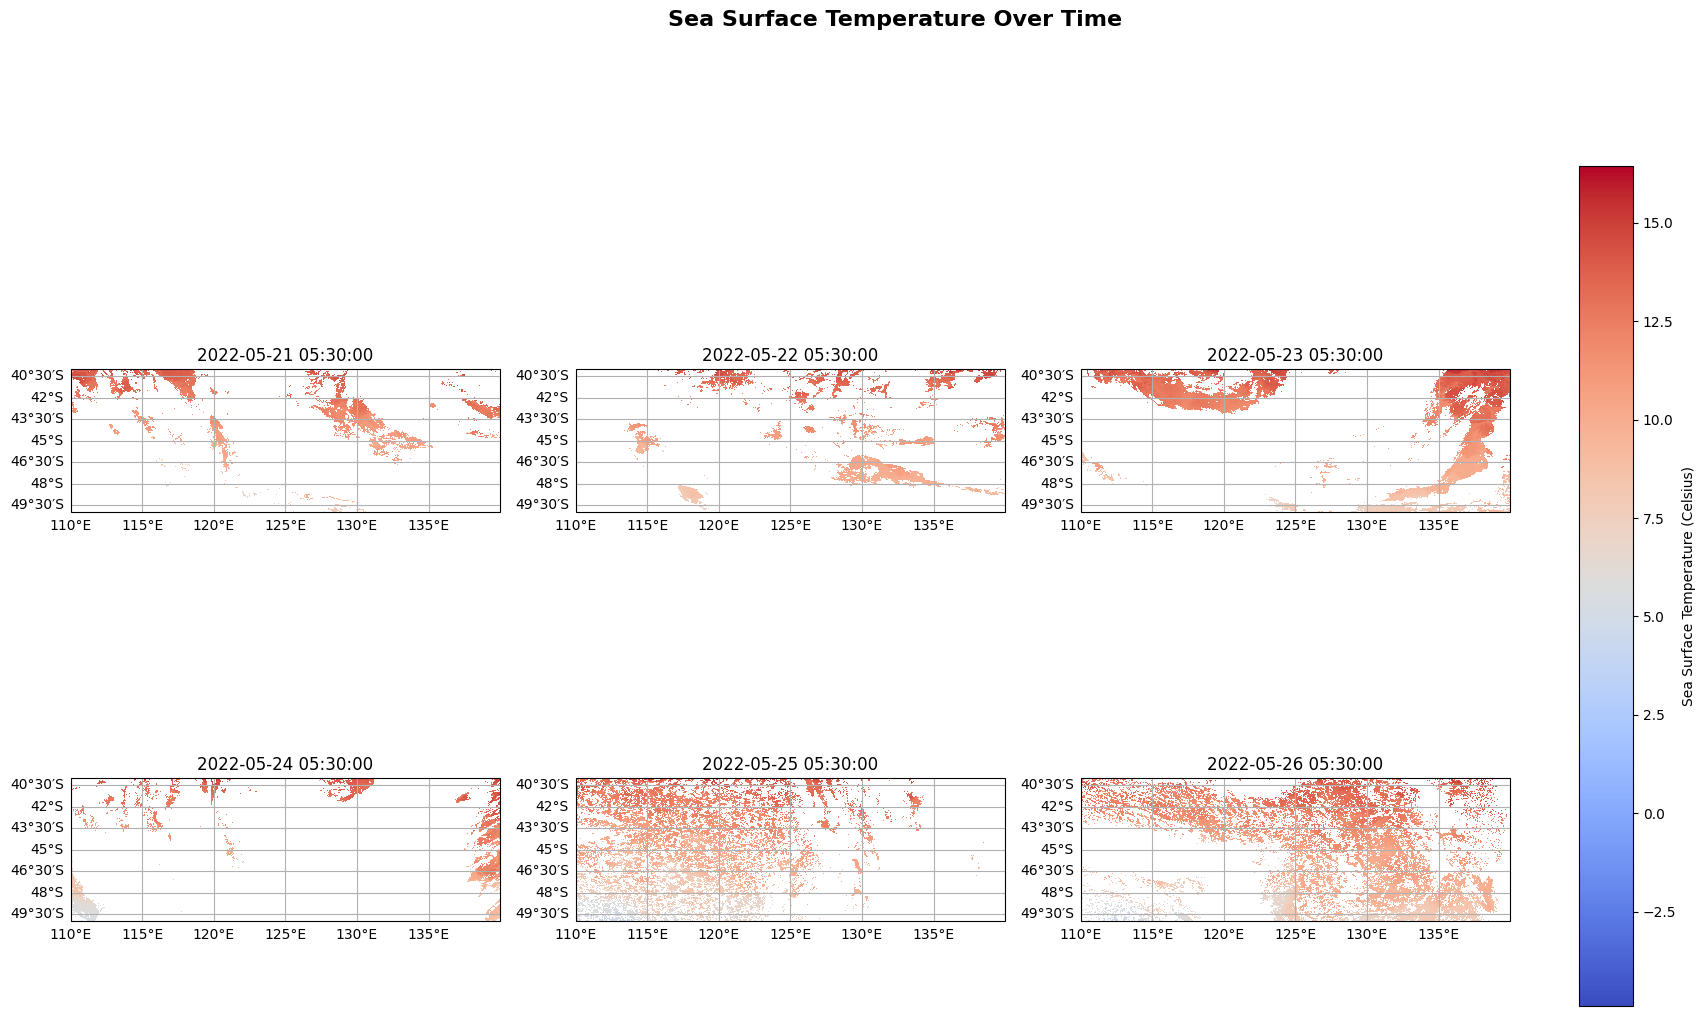

CPU times: user 16.5 s, sys: 6.46 s, total: 22.9 s
Wall time: 24.6 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sst', 
                                                    date_start='2022-02-26',                                                
                                                    lon_name_override="longitude", 
                                                    lat_name_override="latitude", 
                                                    lon_slice=(110, 140), 
                                                    lat_slice=(-50, -40), 
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    log_scale=False)